In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

DATASET_PATH = 'train.csv'
TEST_PATH = 'test.csv'

Описания полей датасета по недвижимости

Id - идентификационный номер квартиры,
DistrictId - идентификационный номер района,
Rooms - количество комнат,
Square - площадь,
LifeSquare - жилая площадь,
KitchenSquare - площадь кухни,
Floor - этаж,
HouseFloor - количество этажей в доме,
HouseYear - год постройки дома,
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности,
Social_1, Social_2, Social_3 - социальные показатели местности,
Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья,
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров,
Price - цена квартиры.



In [80]:
train_df = pd.read_csv(DATASET_PATH, sep=',')
test_df = pd.read_csv(TEST_PATH, sep=',')
train_df.head()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [81]:
test_df.head()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [83]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [84]:
train_df['Id'] = train_df['Id'].astype('str')
train_df['DistrictId'] = train_df['DistrictId'].astype('str')
train_df['Rooms'] = train_df['Rooms'].astype('int64')
train_df['Floor'] = train_df['Floor'].astype('int64')
train_df['HouseFloor'] = train_df['HouseFloor'].astype('int64')

test_df['Id'] = test_df['Id'].astype('str')
test_df['DistrictId'] = test_df['DistrictId'].astype('str')
test_df['Rooms'] = test_df['Rooms'].astype('int64')
test_df['Floor'] = test_df['Floor'].astype('int64')
test_df['HouseFloor'] = test_df['HouseFloor'].astype('int64')

Анализ данных

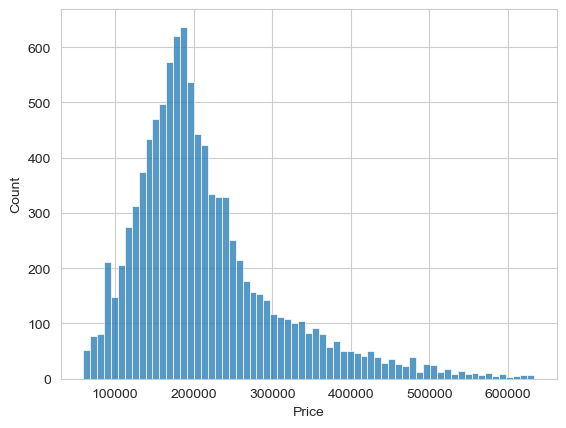

In [85]:
sns.histplot(data=train_df, x="Price")
plt.show()

In [86]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [87]:
train_df.select_dtypes(include=['object']).columns.to_list() # категориальные признаки

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [88]:
train_df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
207      1
117      1
174      1
205      1
209      1
Name: DistrictId, Length: 205, dtype: int64

In [89]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

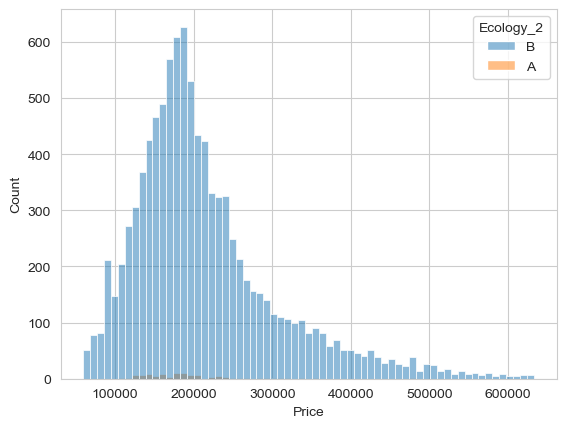

In [90]:
sns.histplot(data=train_df, x="Price" , hue="Ecology_2")
plt.show()

In [91]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

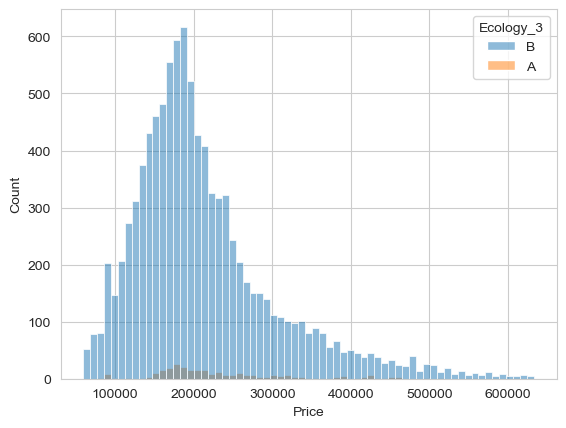

In [92]:
sns.histplot(data=train_df, x="Price" , hue="Ecology_3")
plt.show()

In [93]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

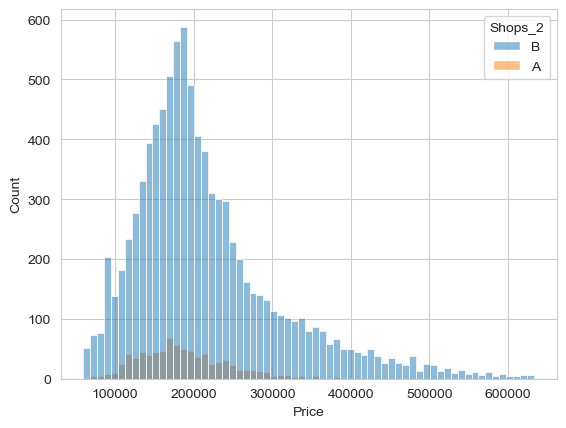

In [94]:
sns.histplot(data=train_df, x="Price" , hue="Shops_2")
plt.show()

In [95]:
train_df['Healthcare_1'].isna().sum()

4798

In [96]:
train_df['LifeSquare'].isna().sum()

2113

In [97]:
train_df[train_df['LifeSquare'].isna()]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2,80.312926,NaN,0.0,14,0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2,64.511437,NaN,1.0,9,17,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
21,11935,27,2,64.711835,NaN,1.0,15,1,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
23,6641,54,3,118.907612,NaN,0.0,2,0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
25,5073,74,2,82.667915,NaN,1.0,16,17,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,244145.827069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,16159,27,1,38.968338,NaN,1.0,10,1,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,95529.569405
9986,2996,1,2,64.994245,NaN,1.0,9,22,1977,0.007122,B,B,1,264,0,NaN,0,1,B,200332.511658
9987,15623,23,2,55.620092,NaN,0.0,2,4,1977,0.034656,B,B,0,168,0,NaN,0,0,B,115797.553006
9994,4158,23,2,64.864198,NaN,1.0,17,17,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,171323.515653


In [98]:
train_df['Rooms'].value_counts()

2     3880
1     3705
3     2235
4      150
5       18
0        8
10       2
19       1
6        1
Name: Rooms, dtype: int64

Предобработка данных. Заполнение пропусков

In [99]:
train_df[(train_df['Rooms'] == 10) | (train_df['Rooms'] == 19) | (train_df['Rooms'] == 0)] # проверим площадь квартир с 0, 10 и 19 комнатами

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10,59.056975,36.223072,10.0,22,22,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1397,12638,27,0,138.427694,136.215499,0.0,4,3,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1454,8491,1,19,42.006046,21.779288,7.0,17,17,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
1981,7917,27,0,212.932361,211.231125,0.0,2,3,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0,41.790881,NaN,0.0,13,0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0,49.483501,NaN,0.0,16,0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0,81.491446,NaN,0.0,4,0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0,2.377248,0.873147,0.0,1,0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0,38.697117,19.345131,9.0,9,16,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0,87.762616,85.125471,0.0,5,15,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [100]:
train_df.loc[train_df['Rooms'].isin([0,10,19]), 'Rooms'] = train_df['Rooms'].median() # заполним медианой train
test_df.loc[test_df['Rooms'].isin([0,10,19]), 'Rooms'] = test_df['Rooms'].median() # заполним медианой test

In [101]:
train_df[train_df['HouseFloor'] == 0] # посмотреть на эти квартиры надо заполнить медианой

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2,80.312926,NaN,0.0,14,0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
23,6641,54,3,118.907612,NaN,0.0,2,0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3,106.958871,0.641822,0.0,17,0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
39,9371,23,2,60.503248,NaN,0.0,16,0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,229778.057902
44,10521,38,3,104.211396,106.340403,0.0,20,0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,12302,30,1,46.072913,48.307844,0.0,4,0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,161403.094034
9769,9384,59,3,98.607328,NaN,0.0,14,0,1977,0.019509,B,B,37,7687,11,176.0,5,5,B,492700.257473
9878,11441,62,2,71.985335,72.453232,0.0,5,0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,158841.624543
9908,3171,62,1,35.873961,NaN,0.0,25,0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,134379.130962


In [102]:
train_df.loc[(train_df['HouseFloor'] == 0) & (train_df['Floor'] > train_df['HouseFloor'].median()), 'HouseFloor'] = train_df.loc[(train_df['HouseFloor'] == 0) & (train_df['Floor'] > train_df['HouseFloor'].median()), 'Floor'] # заполним максимальным этажом для вариантов где медиана меньше'
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median() # заполним медианой

#тоже для test
test_df.loc[(test_df['HouseFloor'] == 0) & (test_df['Floor'] > test_df['HouseFloor'].median()), 'HouseFloor'] = test_df.loc[(test_df['HouseFloor'] == 0) & (test_df['Floor'] > test_df['HouseFloor'].median()), 'Floor'] # заполним максимальным этажом для вариантов где медиана меньше'
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = test_df['HouseFloor'].median() # заполним медианой

In [103]:
print(train_df['Square'].quantile(.975),train_df['Square'].quantile(.025))
print(train_df['LifeSquare'].quantile(.975),train_df['LifeSquare'].quantile(.025))
print(train_df['KitchenSquare'].quantile(.975),train_df['KitchenSquare'].quantile(.025))

train_df[
                    (train_df['Square'] > train_df['Square'].quantile(.975) ) |
                    (train_df['Square'] < train_df['Square'].quantile(.025))]

100.90624548226137 32.10518291149681
80.74810407514714 5.914129735023812
13.0 0.0


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
19,4909,19,3,110.959792,56.996765,11.0,16,25,2012,0.000991,B,B,33,6783,3,NaN,1,9,B,394895.325987
20,8862,0,3,103.605292,47.799426,10.0,12,17,2002,0.319809,B,B,25,4756,16,2857.0,5,8,B,521919.057400
23,6641,54,3,118.907612,NaN,0.0,2,14,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3,106.958871,0.641822,0.0,17,17,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
44,10521,38,3,104.211396,106.340403,0.0,20,20,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,16568,27,4,200.334539,201.627361,25.0,1,2,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016
9918,14904,34,4,104.049130,99.788387,10.0,8,25,2018,0.069753,B,B,53,13670,4,NaN,1,11,B,411971.106869
9939,2357,32,1,31.828480,15.222565,5.0,5,5,1972,0.135650,B,B,46,7960,6,350.0,3,11,B,170343.755036
9961,1579,23,1,27.331108,NaN,1.0,10,12,1977,0.034656,B,B,0,168,0,NaN,0,0,B,60825.032060


In [104]:
train_df[
                    (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.975) ) |
                    (train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.025))]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3,106.958871,0.641822,0.0,17,17,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
44,10521,38,3,104.211396,106.340403,0.0,20,20,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
71,2136,74,2,84.687732,81.905552,0.0,12,17,2017,0.075779,B,B,6,1437,3,NaN,0,2,B,243479.876105
95,4280,34,2,61.334968,4.091945,1.0,26,1,2014,0.069753,B,B,53,13670,4,NaN,1,11,B,286564.441972
123,8753,25,3,85.952306,89.803753,1.0,4,3,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,6053,6,1,41.314775,5.005477,1.0,9,17,2016,0.243205,B,B,5,1564,0,540.0,0,0,B,159149.515475
9895,2737,27,3,123.430072,125.806981,123.0,5,10,2015,0.017647,B,B,2,469,0,NaN,0,0,B,234194.837047
9910,16568,27,4,200.334539,201.627361,25.0,1,2,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016
9918,14904,34,4,104.049130,99.788387,10.0,8,25,2018,0.069753,B,B,53,13670,4,NaN,1,11,B,411971.106869


In [105]:
train_df[
                    (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975) )]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
120,9703,15,4,98.686703,57.307058,15.0,10,17,2008,0.158249,B,B,21,5731,0,NaN,1,0,B,373510.057128
227,16395,2,3,79.722243,44.731219,72.0,12,16,1987,0.130618,B,B,39,10418,9,900.0,1,9,B,370148.625285
280,15679,11,2,62.927952,28.838300,17.0,4,3,2014,0.012339,B,B,35,5776,1,2078.0,2,4,B,100378.010856
343,716,113,3,125.287183,127.477137,19.0,26,24,2017,0.050756,B,B,24,5469,1,145.0,0,1,B,522197.035995
359,15722,31,2,82.435495,48.655394,16.0,23,40,2013,0.151346,B,A,32,5889,10,830.0,4,1,B,558262.139114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9852,16641,111,4,117.201937,69.898092,14.0,4,2,2017,0.093443,B,B,23,4635,5,3300.0,2,4,B,197593.112769
9889,12918,23,2,51.440463,53.134243,51.0,3,17,2017,0.005767,B,B,1,388,0,NaN,0,0,B,88150.012510
9895,2737,27,3,123.430072,125.806981,123.0,5,10,2015,0.017647,B,B,2,469,0,NaN,0,0,B,234194.837047
9910,16568,27,4,200.334539,201.627361,25.0,1,2,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016


In [106]:
train_df = train_df[train_df['Square'].isnull() |
                    (train_df['Square'] < train_df['Square'].quantile(.975) ) &
                    (train_df['Square'] > train_df['Square'].quantile(.025))] # уберем выбросы

train_df = train_df[train_df['LifeSquare'].isnull() |
                    (train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.975) ) &
                    (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.025))] # уберем выбросы

train_df = train_df[train_df['KitchenSquare'].isnull() |
                    (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.975) )] # уберем выбросы


In [107]:
#заполним отсутствующие значения train и test

train_df['LifeSquare'].fillna(train_df['Square'], inplace=True)
train_df['Healthcare_1'].fillna(0, inplace=True)

test_df['LifeSquare'].fillna(test_df['Square'], inplace=True)
test_df['Healthcare_1'].fillna(0,inplace=True)

In [108]:
train_df.loc[(train_df['Square'] < train_df['LifeSquare']), 'Square'] = train_df.loc[(train_df['Square'] < train_df['LifeSquare']), 'LifeSquare']

#тоже для test
test_df.loc[(test_df['Square'] < test_df['LifeSquare']), 'Square'] = test_df.loc[(test_df['Square'] < test_df['LifeSquare']), 'LifeSquare']


In [109]:
train_df.shape

(8719, 20)

In [110]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020
test_df.loc[test_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [111]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace ({'A':0, 'B' :1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace ({'A':0, 'B' :1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B' :1})

test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace ({'A':0, 'B' :1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace ({'A':0, 'B' :1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0, 'B' :1})

In [112]:
district_size=train_df['DistrictId'].value_counts().reset_index().rename(columns={'index': 'DistrictId', 'DistrictId': 'Districtsize'})
district_size_test=test_df['DistrictId'].value_counts().reset_index().rename(columns={'index': 'DistrictId', 'DistrictId': 'Districtsize'})

In [113]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
test_df = test_df.merge(district_size_test, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Districtsize
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,...,5,0.0,0,11,B,184966.930730,1,1,1,20
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,...,1,240.0,1,16,B,300009.450063,1,1,1,78
2,4765,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,...,0,229.0,1,3,B,220925.908524,1,1,1,153
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,...,3,1084.0,0,5,B,175616.227217,1,1,1,159
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,...,1,2078.0,2,4,B,150226.531644,1,1,1,94


In [114]:
train_df['IsDistrictLarge'] = (train_df['Districtsize'] > 100).astype(int)
test_df['IsDistrictLarge'] = (test_df['Districtsize'] > 100).astype(int)

In [115]:
train_df['OptimalFloor'] = 1
train_df.loc[(train_df['Floor'] == 1) | (train_df['Floor'] == train_df['HouseFloor']), 'OptimalFloor'] = 0

test_df['OptimalFloor'] = 1
test_df.loc[(test_df['Floor'] == 1) | (test_df['Floor'] == test_df['HouseFloor']), 'OptimalFloor'] = 0

Обучение моделей

In [116]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_2_bin',
'Ecology_3_bin', 'Social_1', 'Social_2','Social_3','Shops_1', 'Shops_2_bin', 'Healthcare_1', 'Helthcare_2']
new_feature_names = ['IsDistrictLarge', 'OptimalFloor']
target_name = 'Price'

In [117]:
from sklearn.model_selection import train_test_split

X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(random_state=21)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=21)

R2 на обучающей выборке - 0.9586666808696042 R2 на валидационной выборке - 0.7297788278420292


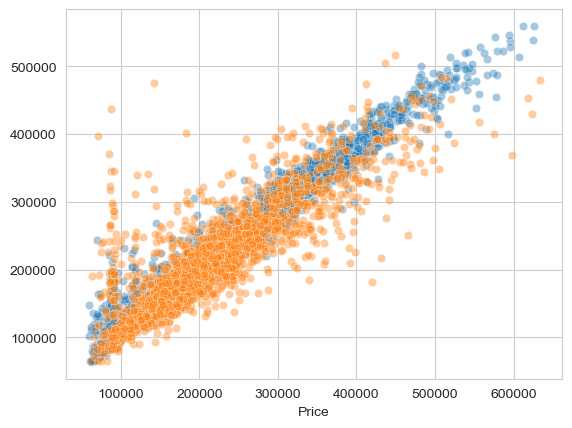

In [119]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print("R2 на обучающей выборке - {} R2 на валидационной выборке - {}".format(r2_score(y_train,y_train_pred),r2_score(y_test, y_test_pred)))

sns.scatterplot(y_train, y_train_pred, alpha=0.4)
sns.scatterplot(y_test, y_test_pred, alpha=0.4)
plt.show()

In [120]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), columns=[ 'feature_name','importance'])
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.230718
0,Rooms,0.221197
16,IsDistrictLarge,0.108792
11,Social_3,0.071100
10,Social_2,0.053936
3,KitchenSquare,0.050975
6,HouseYear,0.047512
2,LifeSquare,0.046809
9,Social_1,0.046729
4,Floor,0.032801


прогнозирование на тестовой выборке

In [122]:
Y_test_df_pred = rf_model.predict(test_df[feature_names + new_feature_names])

In [124]:
test_df['Price'] = Y_test_df_pred
test_df[['Id', 'Price']].to_csv('Potysyev_predictions.csv', index=False)